# Binary Classification on raisin dataset


In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# import data
df = pd.read_csv('https://gist.githubusercontent.com/AkMo3/9e63772de6c3503ca522547b7aff4fdc/raw/a4a1b4a6d0078b97d6ede9e2ea070d8c7dab80de/Raisin_Dataset.csv')
print(df.shape)
df.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<a id='basic_stats'></a>
# Basic Stats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
# target
df.Class.value_counts()

,count
Class,
Kecimen,450
Besni,450


In [5]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### Target is perfectly balanced.

In [6]:
# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength',
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
x = df[features_num]
y = df['Class']
df[features_num].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


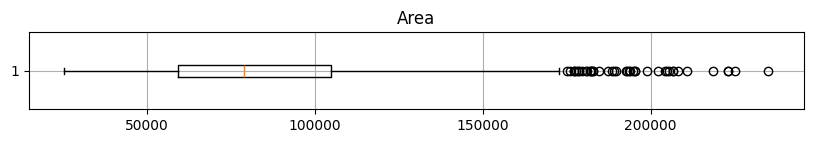

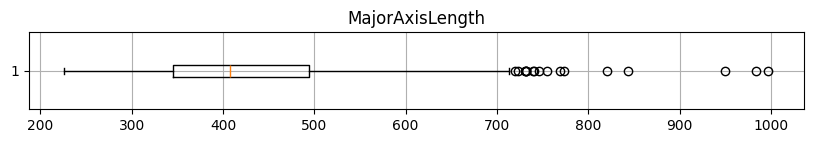

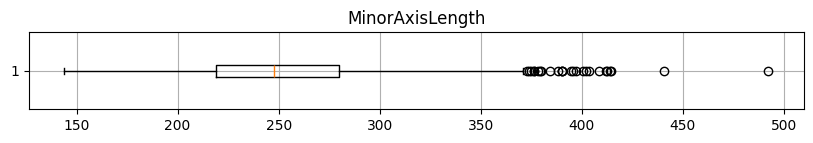

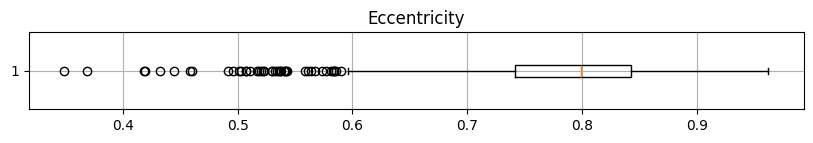

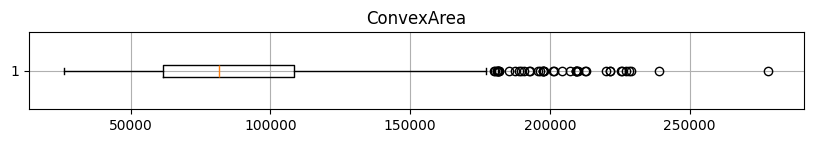

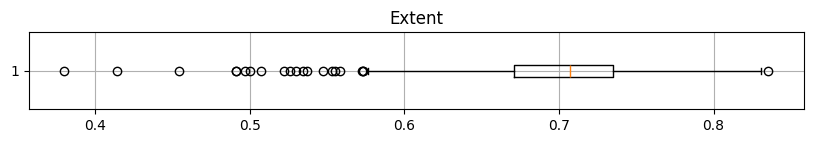

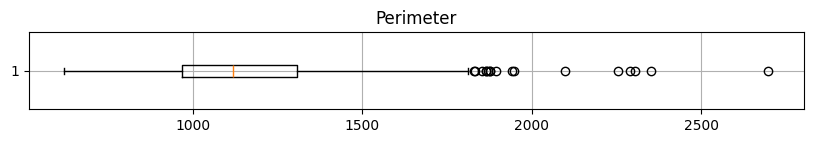

In [7]:
# boxplots of all features
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

In [11]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Calculate mean and std for numeric columns only
mean = df[numeric_cols].mean()
std = df[numeric_cols].std()

# Replace outlier values (more than 2 std deviations from the mean) with NaN
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols].sub(mean).div(std).abs().gt(2))

# Drop rows with any NaN values
df = df.dropna()


<ipython-input-11-aa6ee8e646f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols].sub(mean).div(std).abs().gt(2))


<a id='feature_corr'></a>
# Feature Correlations

<Figure size 1000x500 with 0 Axes>

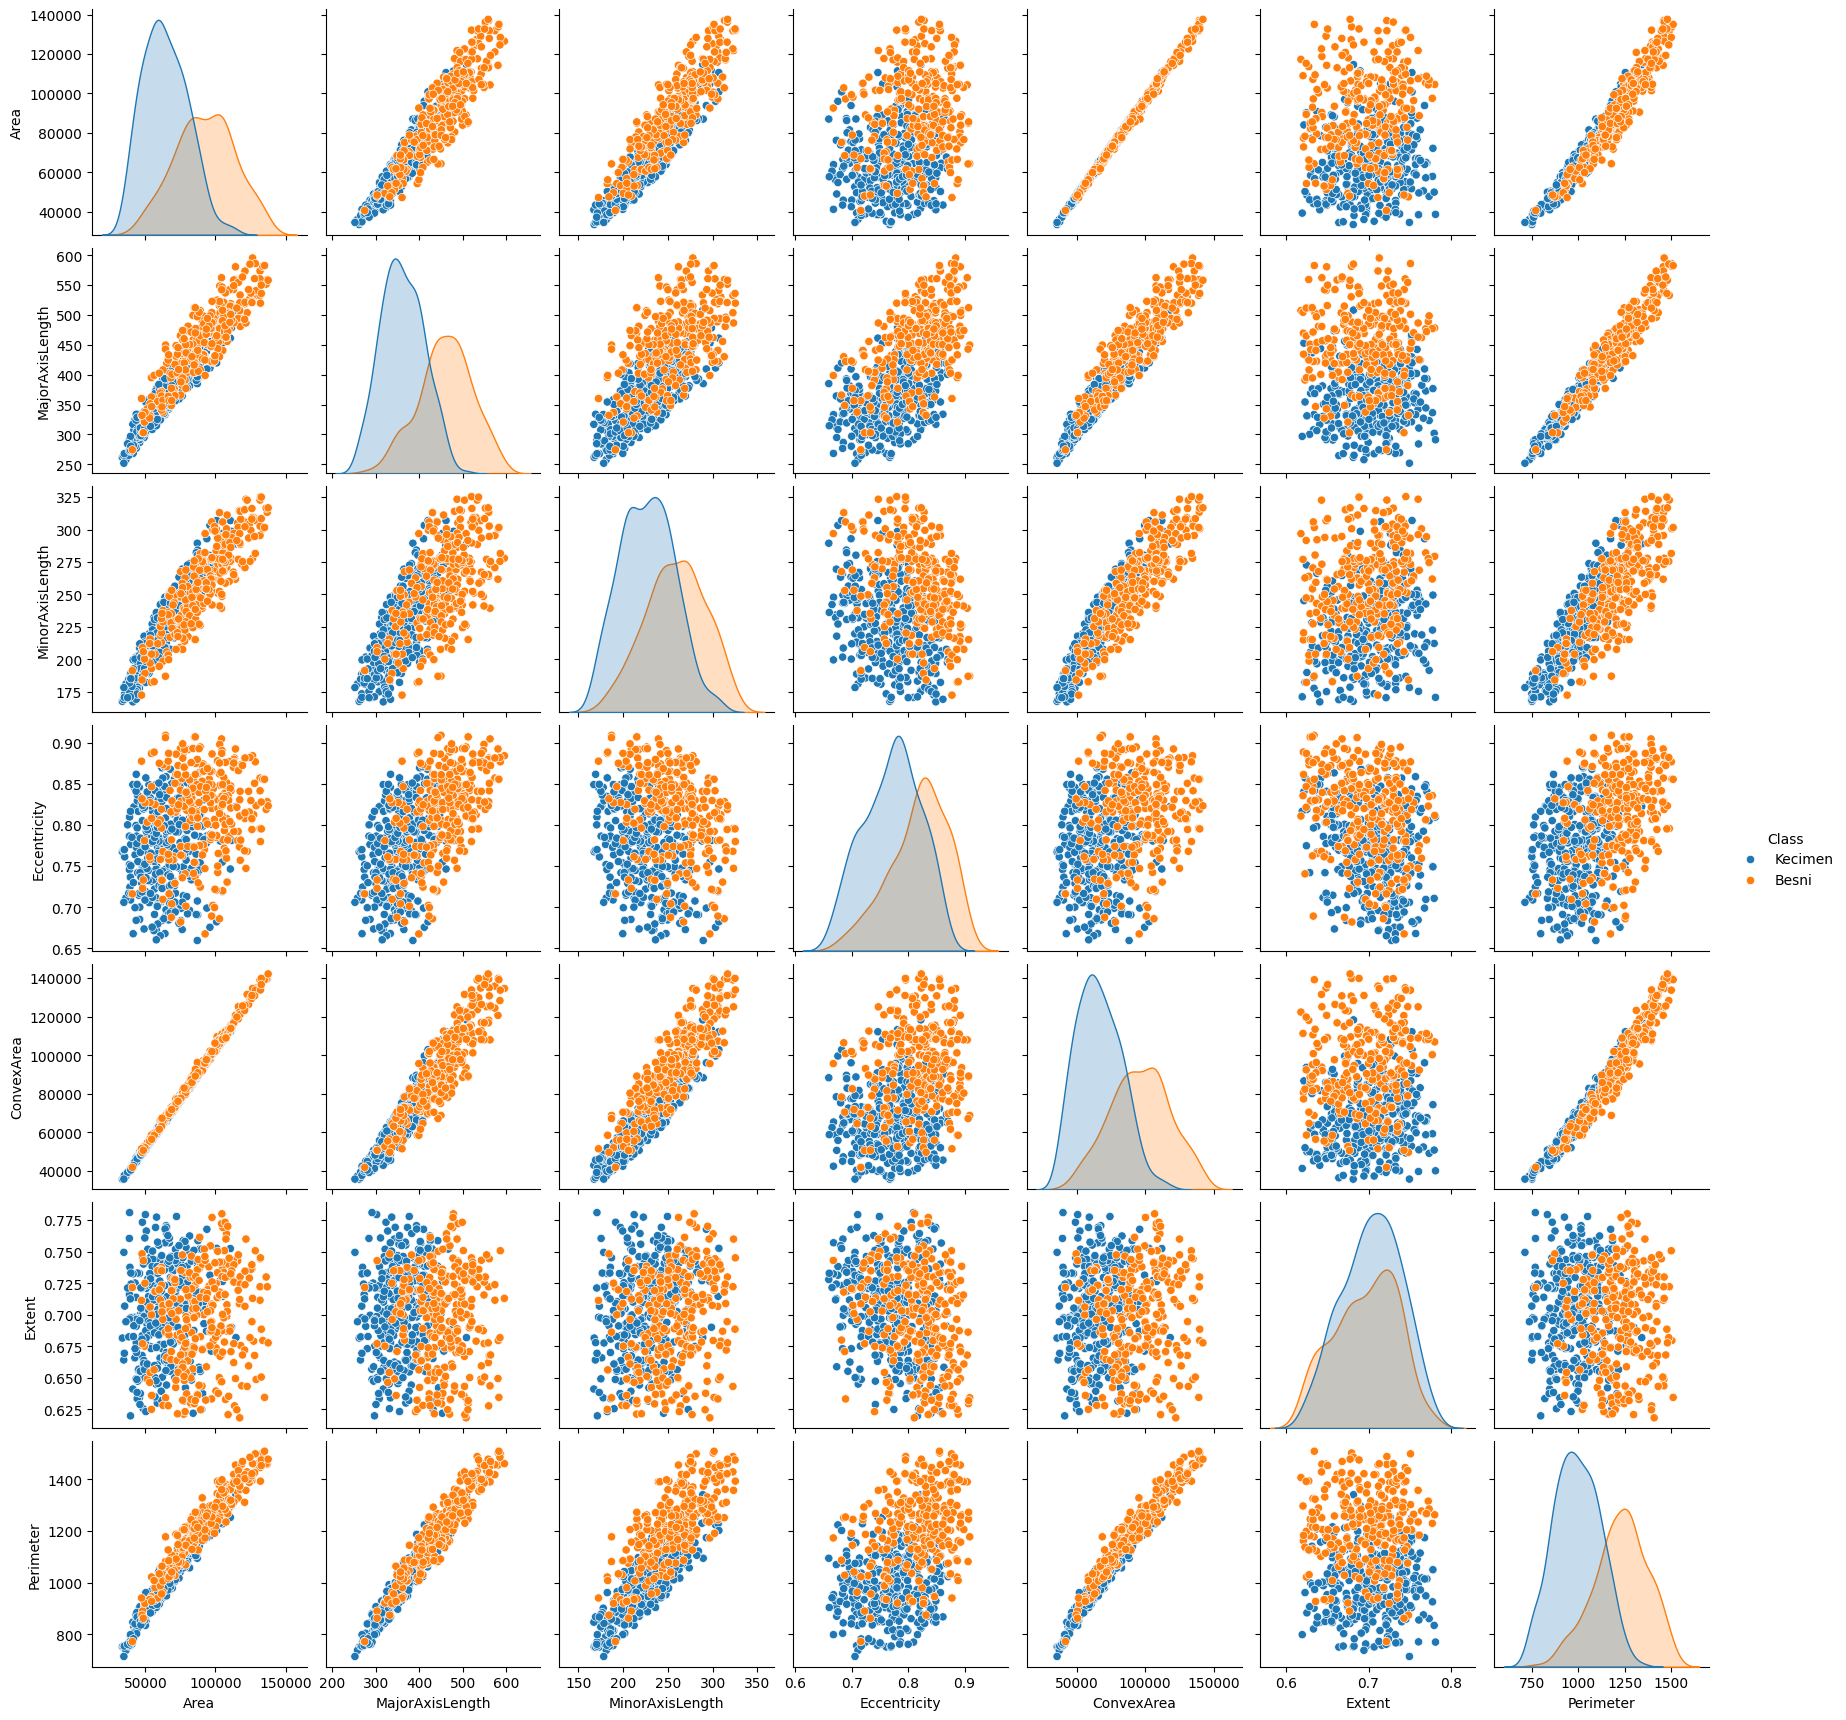

In [12]:
# pairwise scatterplot, representing Class by color
plt.figure(figsize = (10,5))
sns.pairplot(df, hue="Class", diag_kind = "kde")
plt.show()

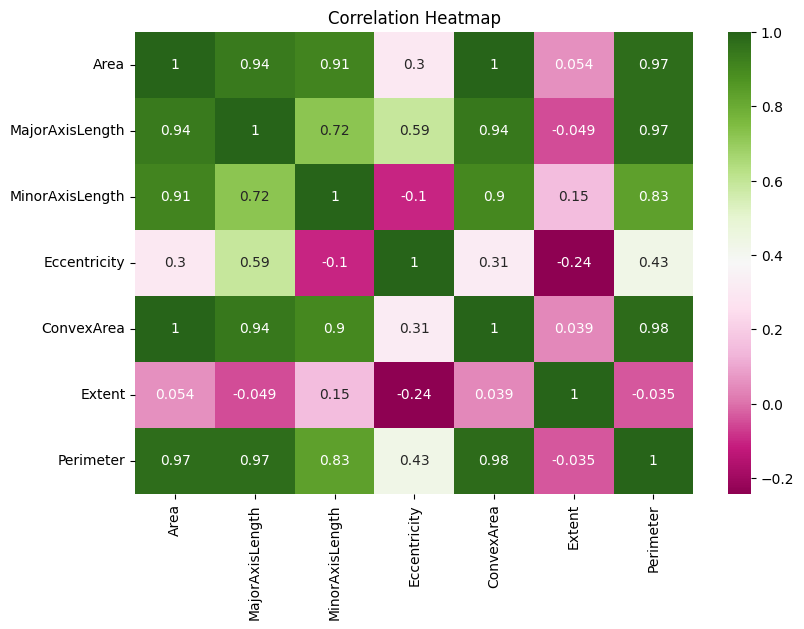

In [15]:
# Calculate correlation on numeric columns only
cor = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(data=cor, annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()


<a id='features_by_class'></a>
# Feature Distributions by Class

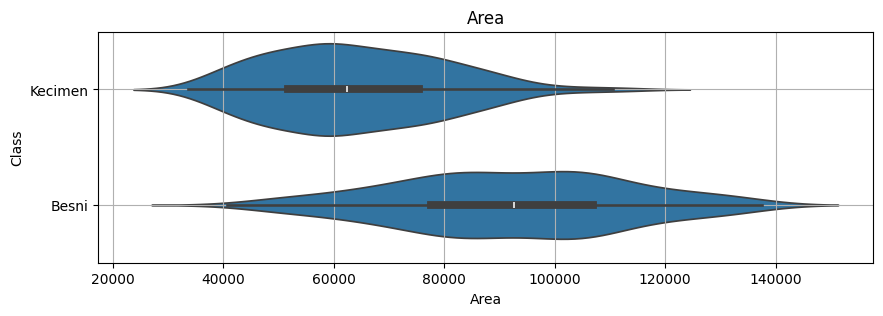

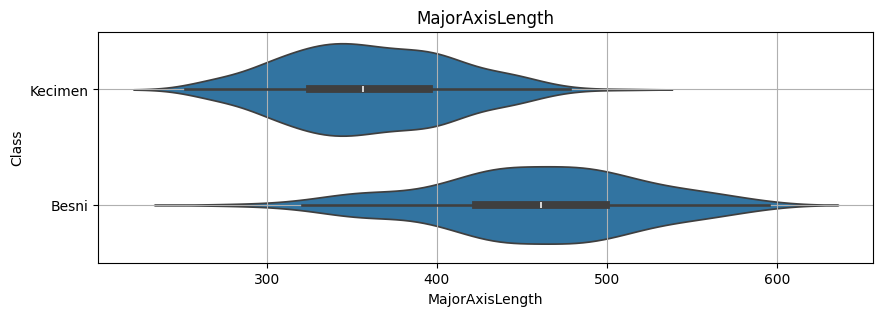

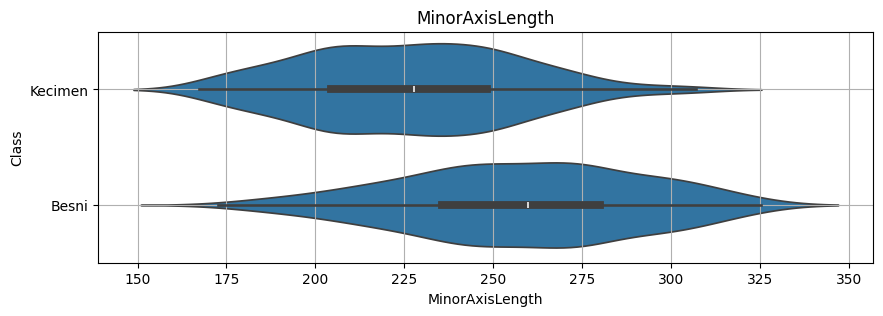

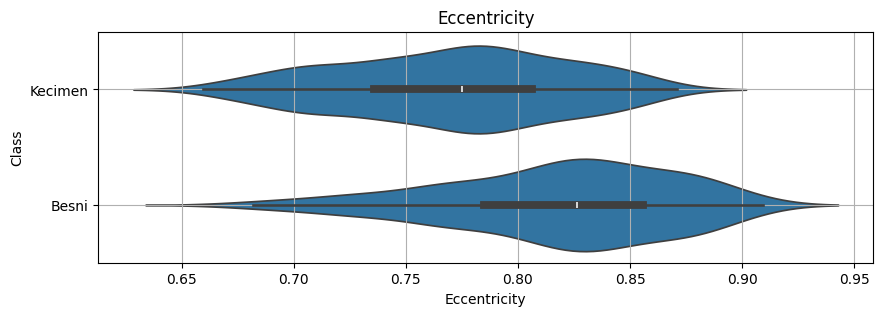

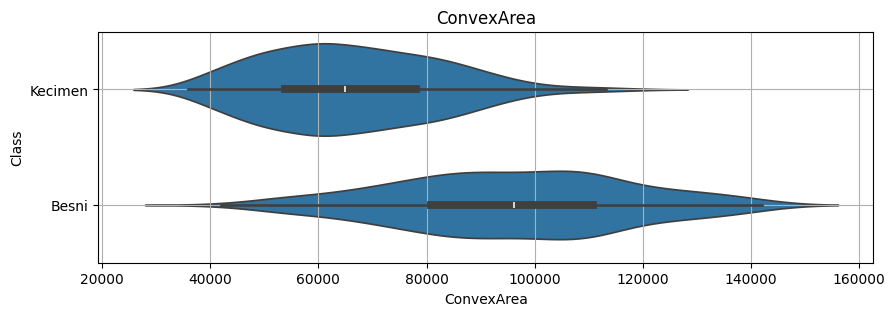

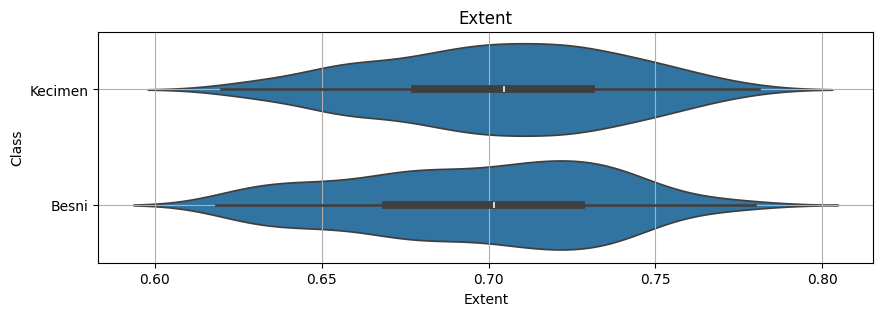

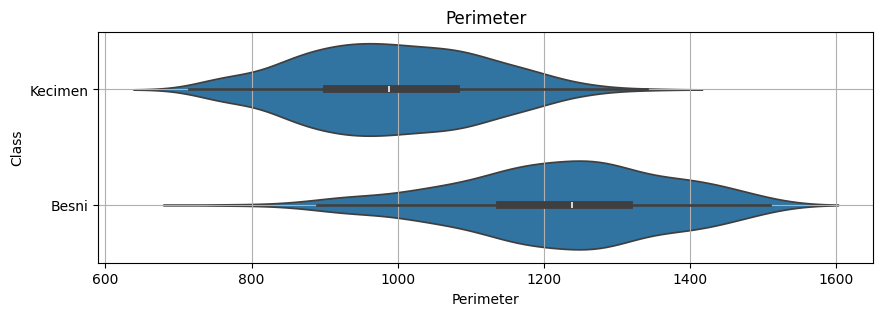

In [16]:
# plot distributions split by class for each feature
for f in features_num:
    plt.figure(figsize=(10,3))
    sns.violinplot(data=df, y='Class', x=f)
    plt.grid()
    plt.title(f)
    plt.show()

<a id='PCA'></a>
# Dimensionality Reduction - PCA

In [17]:
# standardize features
df4pca_std = StandardScaler().fit_transform(df[features_num])
# run PCA
pc_model = PCA(n_components=3)
pc = pc_model.fit_transform(df4pca_std)
# append PCA components to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]

In [50]:
# interactive 3D plot - colored by class; size ~ area
fig = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    color=df.Class.astype(str),
                    size=df.Area,
                    hover_data=features_num,
                    opacity=0.35)
fig.update_layout(title='Visualization using PCA dimension reduction')
fig.show()

## <p style="padding:10px;background-color:#AED6F1;margin:0;color:#F51033;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🤖Logistic Regression</p>

In [19]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

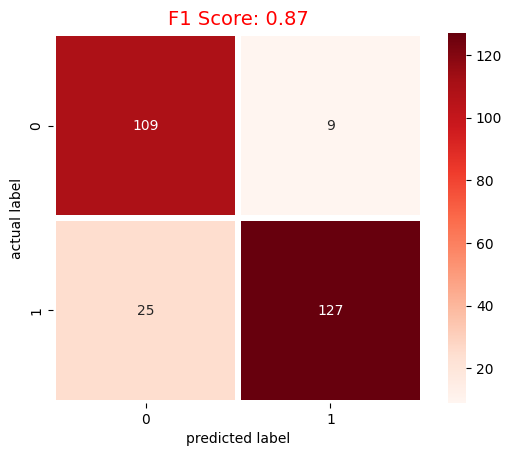

In [21]:
# confusion matrix and f1 score
f1_score_logr = f1_score(y_test, y_pred, average='micro')
cm_logr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='red')
plt.show()

In [22]:
# Accuracy score
lr_acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {lr_acc}")


Accuracy Score is 0.8740740740740741


## <p style="padding:10px;background-color:#AED6F1;margin:0;color:#F51033;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🤖K-Nearest Neighbour</p>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

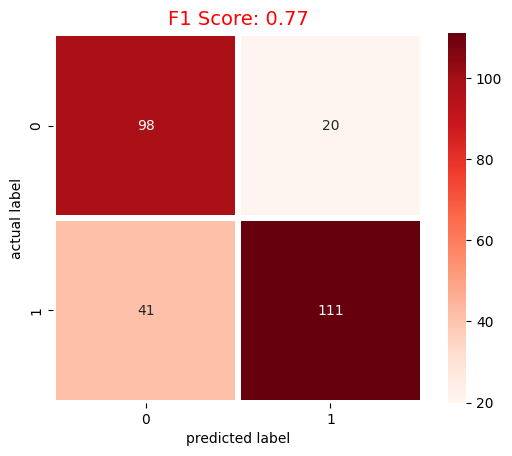


Accuracy Score is 0.774074074074074


In [24]:
# confusion matrix and f1 score
f1_score_knn = f1_score(y_test,y_pred, average='micro')
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_knn:.2f}',size=14,color='red')
plt.show()

# Accuracy score
lr_acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {lr_acc}")

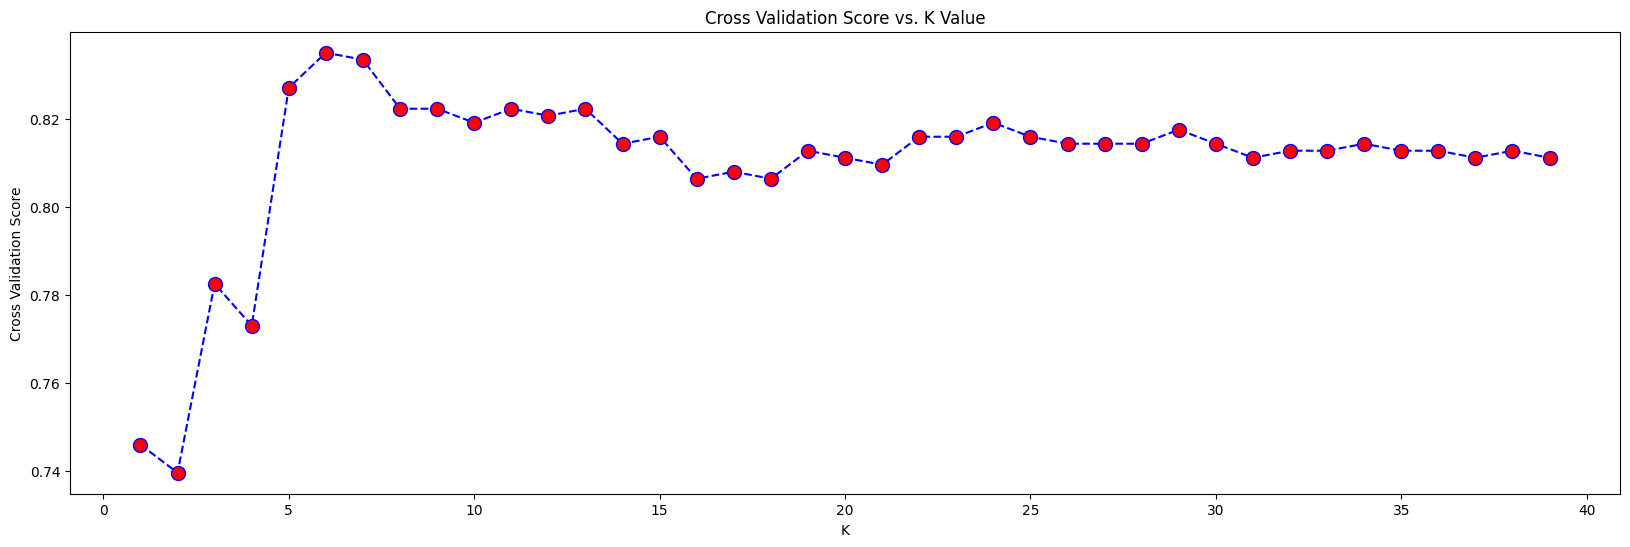


Best value of k: 6


In [25]:
# finding optimum k
error_rate = []

# specify the values of k to test
k_values = range(1, 40)

for i in range(1,40):
    knn_test = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    # evaluate the model using cross-validation
    cv_scores = cross_val_score(knn_test, X_train, y_train, cv=5)
    error_rate.append(cv_scores.mean())

# find the value of k with the highest mean score
plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Cross Validation Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross Validation Score')
plt.show()

# find the value of k with the highest mean score
bestKVal = k_values[error_rate.index(max(error_rate))]
print("\nBest value of k:", bestKVal)


In [26]:
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(X_train, y_train)

y_pred = knn6.predict(X_test)

f1_score_knn = f1_score(y_test,y_pred, average='micro')

# Accuracy score
lr_acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {lr_acc}")


Accuracy Score is 0.8333333333333334


# Support Vector Machine

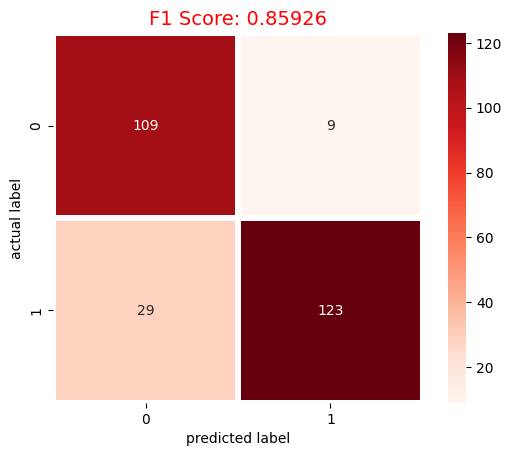

In [27]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
# confusion matrix and f1 score
f1_score_svc = f1_score(y_test,y_pred, average='micro')
cm_svc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_svc:.5f}',size=14,color='red')
plt.show()

## Naive Bayes

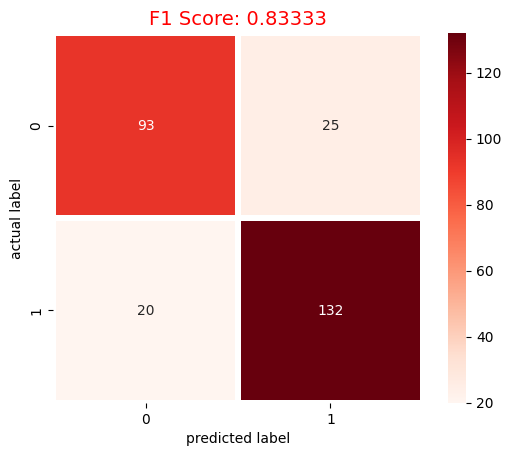

In [28]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)

# confusion matrix and f1 score
f1_score_mnb = f1_score(y_test,y_pred, average='micro')
cm_mnb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_mnb, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_mnb:.5f}',size=14,color='red')
plt.show()


### Decision Tree

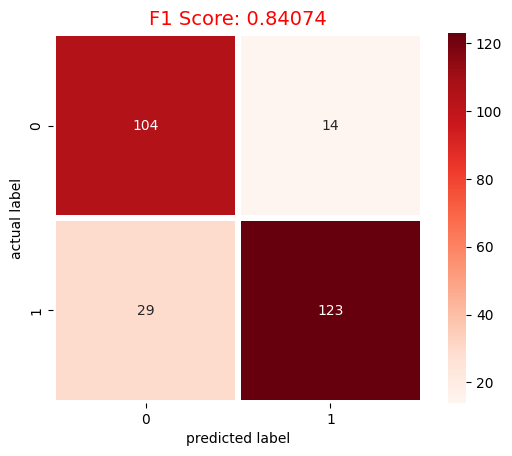

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

# confusion matrix and f1 score
f1_score_dtc = f1_score(y_test,y_pred, average='micro')
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_dtc:.5f}',size=14,color='red')
plt.show()



<a id='RF'></a>
# Random Forest Model

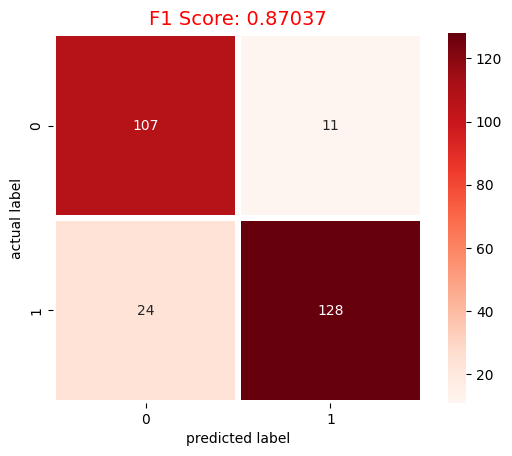

In [30]:
# define random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, max_depth=8,
                             random_state = 111, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


# confusion matrix and f1 score
f1_score_rfc = f1_score(y_test,y_pred, average='micro')
cm_rfc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_rfc:.5f}',size=14,color='red')
plt.show()


In [31]:
# cross validation scores
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='roc_auc')
print(scores)

[0.90353535 0.90012626 0.92133838 0.92448773 0.92613205]


In [32]:
print('CV AUC - mean: ', np.mean(scores))
print('CV AUC - stdev:', np.std(scores))

CV AUC - mean:  0.9151239564887426
CV AUC - stdev: 0.011015480698164824


In [33]:
# fit model
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10,
                       random_state=111)

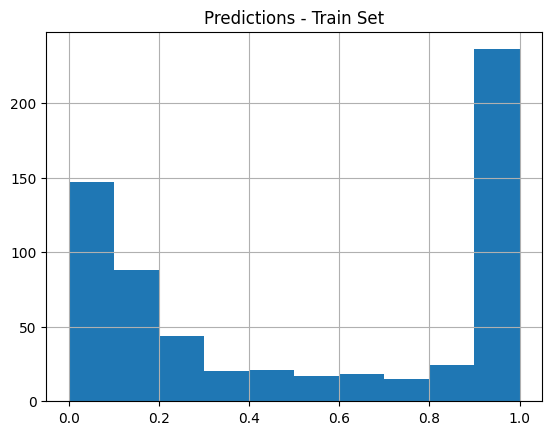

In [34]:
# predict on train set
y_train_pred = pd.DataFrame(rfc.predict_proba(X_train), columns=['p0','p1'])
y_train_pred_p = y_train_pred.p0
# plot predictions (probabilities)
plt.hist(y_train_pred_p)
plt.title('Predictions - Train Set')
plt.grid()
plt.show()


In [35]:
# convert target to 0/1
y_train_01 = pd.factorize(y_train)
y_train_01 = y_train_01[0]

In [36]:
# ROC Curve and AUC
fpr, tpr, threshold = metrics.roc_curve(y_train_01, y_train_pred_p)
auc_train = metrics.auc(fpr,tpr)
print('AUC Train:', auc_train)

AUC Train: 0.9914136411417482


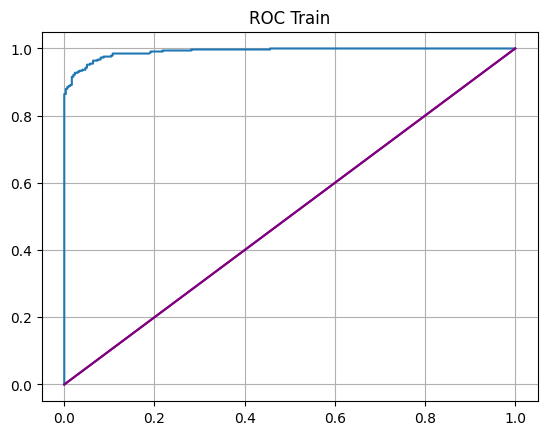

In [37]:
# plot ROC Curve
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='purple')
plt.title('ROC Train')
plt.grid()
plt.show()

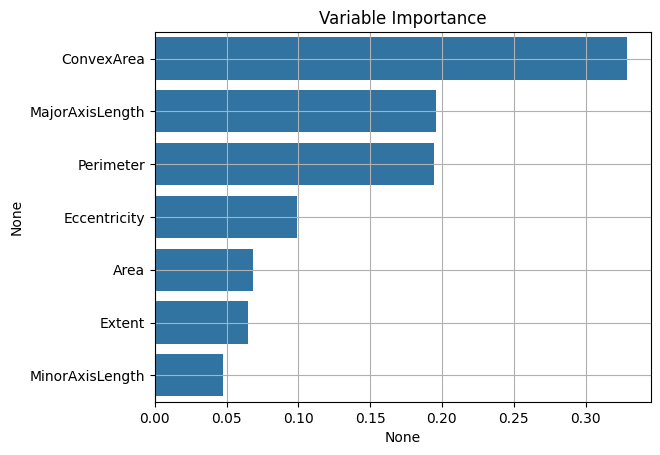

In [38]:
# get variable importance
feature_imp = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# plot variable importance
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Variable Importance')
plt.grid()
plt.show()

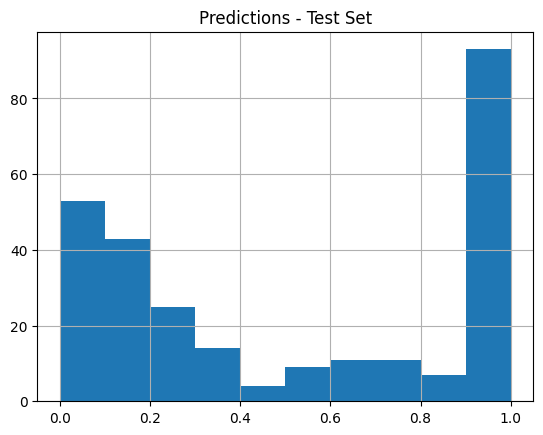

In [39]:
# predict on test set
y_test_pred = pd.DataFrame(rfc.predict_proba(X_test), columns=['p0','p1'])
y_test_pred_p = y_test_pred.p0

# plot predictions (probabilities)
plt.hist(y_test_pred_p)
plt.title('Predictions - Test Set')
plt.grid()
plt.show()

In [40]:
# convert target to 0/1
y_test_01 = pd.factorize(y_test)
y_test_01 = y_test_01[0]

In [41]:
# ROC Curve and AUC
fpr, tpr, threshold = metrics.roc_curve(y_test_01, y_test_pred_p)
auc_test = metrics.auc(fpr,tpr)
print('AUC Test:', auc_test)

AUC Test: 0.9437165477252453


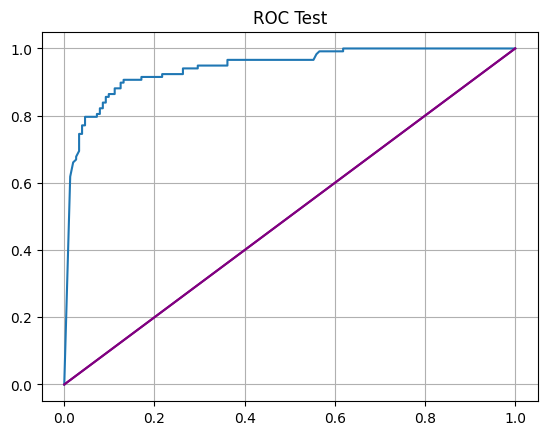

In [42]:
# plot ROC Curve
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='purple')
plt.title('ROC Test')
plt.grid()
plt.show()

# Evaluate Models

##Cross Val Score

In [43]:
# cross_val_score
from sklearn.model_selection import cross_val_score

print(cross_val_score(rfc, x, y, cv=5))

[0.88888889 0.88888889 0.88333333 0.85555556 0.83888889]


In [44]:
# mean of accuracies
accuracies = cross_val_score(rfc, X_train, y_train, cv = 5)
print(f'Accuracy (mean):{accuracies.mean()*100}')
print('std: %',accuracies.std()*100)

Accuracy (mean):86.34920634920634
std: % 2.093794596551258


In [45]:
# inference from cross_val_score
print(f'Random Forest F1 Score: {f1_score_rfc*100:.2f}')
print(f'Accuracy (mean):{accuracies.mean()*100:}')
print(f'std: % {accuracies.std()*100:.2f}')

Random Forest F1 Score: 87.04
Accuracy (mean):86.34920634920634
std: % 2.09


There is no overfitting as they are very close to each other, which indicate our model is good.


## Comparision of Confusion Matrices

In [46]:
# Confusion Matrices
print('\033[1m' + '\033[96m' + '-CONFUSION MATRICES-\n' + '\033[0m'+'\033[0m')

print('\033[1m' + f'Logistic Regression' +'\033[0m' + f'\n{cm_logr}' + f' F1 Score: {f1_score_logr:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'KNN-K Nearest Neighbors' +'\033[0m' + f'\n{cm_knn}' + f' F1 Score: {f1_score_knn:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'SVC-Support Vector Classifier' +'\033[0m' + f'\n{cm_svc}' + f' F1 Score: {f1_score_svc:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Multinomial Naive Bayes' +'\033[0m' + f'\n{cm_mnb}' + f' F1 Score: {f1_score_mnb:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Decision Tree Classifier' +'\033[0m' + f'\n{cm_dtc}' + f' F1 Score: {f1_score_dtc:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Random Forest Classifier' +'\033[0m' + f'\n{cm_rfc}' + f' F1 Score: {f1_score_rfc:.2f}\n\n' + '\033[0m'  )

-CONFUSION MATRICES-

Logistic Regression
[[109   9]
 [ 25 127]] F1 Score: 0.87


KNN-K Nearest Neighbors
[[ 98  20]
 [ 41 111]] F1 Score: 0.83


SVC-Support Vector Classifier
[[109   9]
 [ 29 123]] F1 Score: 0.86


Multinomial Naive Bayes
[[ 93  25]
 [ 20 132]] F1 Score: 0.83


Decision Tree Classifier
[[104  14]
 [ 29 123]] F1 Score: 0.84


Random Forest Classifier
[[107  11]
 [ 24 128]] F1 Score: 0.87




## Comparision of F1 Scores

In [47]:
# Let's see F1 Scores in a table
NamesOfAlgorithms_df = pd.DataFrame(['Logistic Regression','KNN - K Nearest Neighbors','SVC - Support Vector Classifier','Multinomial Naive Bayes','Decision Tree Classifier','Random Forest Classifier'])
AcScoresOfAlgorithms_df = pd.DataFrame([f1_score_logr,f1_score_knn,f1_score_svc,f1_score_mnb,f1_score_dtc,f1_score_rfc])

f1_score_table = pd.concat([NamesOfAlgorithms_df,AcScoresOfAlgorithms_df],axis=1)
f1_score_table.columns=['ALGORİTHM','F1 SCORE',]

f1_score_table.sort_values(by='F1 SCORE',ascending=True)



,ALGORİTHM,F1 SCORE
1,KNN - K Nearest Neighbors,0.833333
3,Multinomial Naive Bayes,0.833333
4,Decision Tree Classifier,0.840741
2,SVC - Support Vector Classifier,0.859259
5,Random Forest Classifier,0.870370
0,Logistic Regression,0.874074


<ipython-input-48-654062f49c65>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




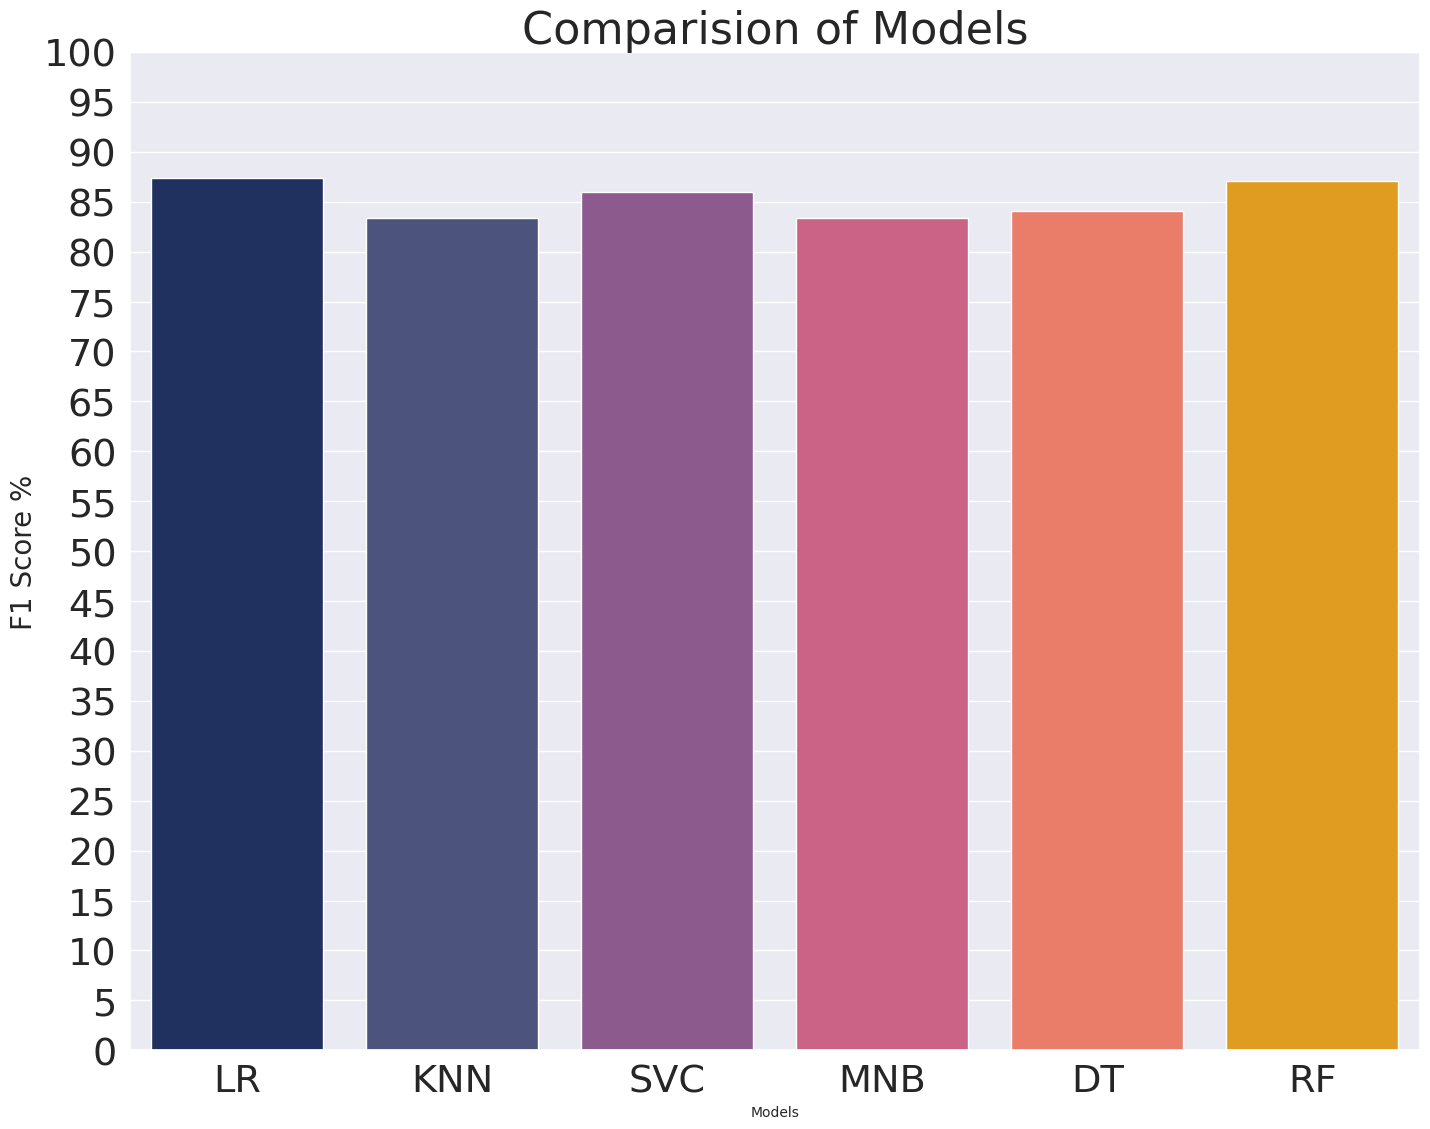

In [48]:
# F1 Scores Comparison on a Bar Chart
dict_Scores = {'LR': f1_score_logr*100 , 'KNN': f1_score_knn*100,
               'SVC': f1_score_svc*100, 'MNB': f1_score_mnb*100,
               'DT': f1_score_dtc*100, 'RF': f1_score_rfc*100
              }

colors = ["#152c6b", "#444e86", "#955196", "#dd5182","#ff6e54",'#ffa600']
sns.set_style("whitegrid")
sns.set(font_scale = 2.5)
plt.figure(figsize=(15,12))
sns.barplot(x=list(dict_Scores.keys()), y=list(dict_Scores.values()), palette=colors)
plt.yticks(np.arange(0,101,5))
plt.title('Comparision of Models', fontsize=32)
plt.ylabel("F1 Score %", fontsize=20)
plt.xlabel("Models", fontsize=10)
plt.tight_layout()
plt.show()